In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(".."))  # <-- ADD THIS
from models.hmm_model import HMM
from models.viterbi_decoder import ViterbiDecoder
from utils.metrics import compute_accuracy

In [4]:
seqs = np.load("../data/sequences/simulated_sequences.npy", allow_pickle=True)
labels = np.load("../data/sequences/ground_truth_labels.npy", allow_pickle=True)

In [5]:
index = 0
seq = seqs[index]
true_states = labels[index]

print("Example amino acid sequence:")
print("".join(seq))
print("True state sequence:")
print(true_states)

Example amino acid sequence:
SAPVPFGPSDFGCYDCCKFQKIENTVNSLTQYYNTHSDNIAGVTAAAEFN
True state sequence:
['other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'alpha-helix' 'alpha-helix' 'alpha-helix' 'alpha-helix' 'alpha-helix'
 'alpha-helix']


In [6]:
hmm = HMM("../data/transition_probabilities.json", "../data/emission_probabilities.json")
viterbi = ViterbiDecoder(hmm)

In [7]:
predicted_states = viterbi.decode(seq)
print("Predicted state sequence:")
print(predicted_states)

Predicted state sequence:
['other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']


In [8]:
accuracy = compute_accuracy(true_states, predicted_states)
print(f"Viterbi Accuracy on sequence {index}: {accuracy:.2f}")

Viterbi Accuracy on sequence 0: 0.88


In [9]:
colors = {'alpha-helix': 'red', 'other': 'blue'}
plt.figure(figsize=(15, 2))

<Figure size 1500x200 with 0 Axes>

<Figure size 1500x200 with 0 Axes>

<BarContainer object of 50 artists>

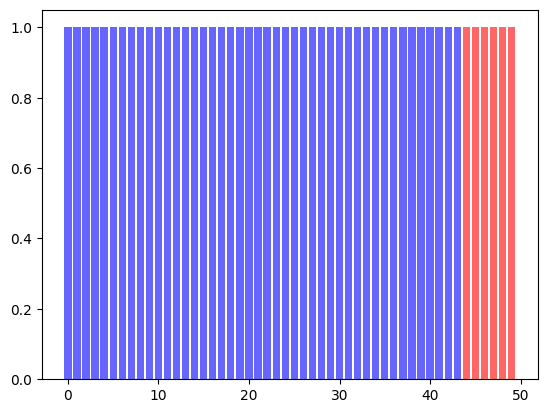

In [10]:
plt.bar(range(len(seq)), [1]*len(seq), color=[colors[s] for s in true_states], alpha=0.6, label='True')

<BarContainer object of 50 artists>

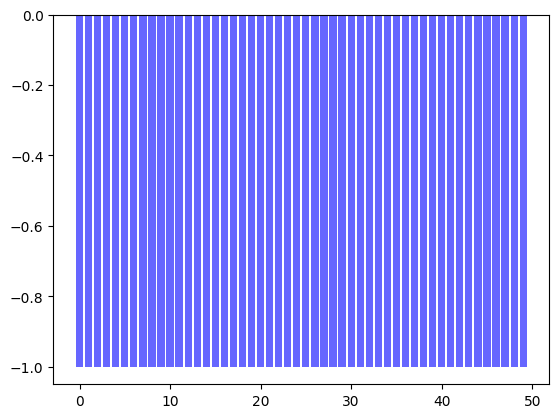

In [11]:
plt.bar(range(len(seq)), [-1]*len(seq), color=[colors[s] for s in predicted_states], alpha=0.6, label='Predicted')

C:\Users\elang\AppData\Local\Temp\ipykernel_10468\2851752751.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


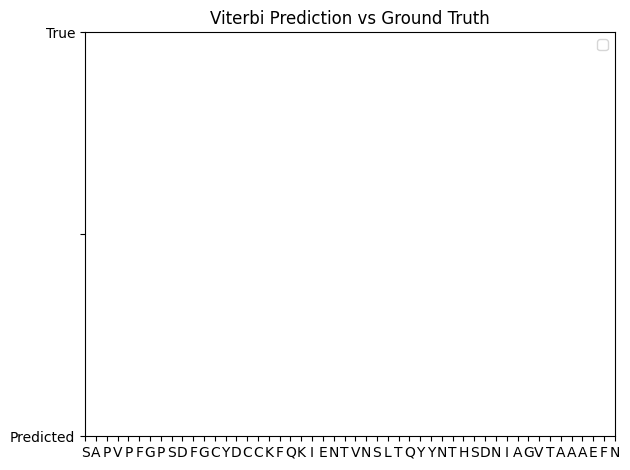

In [12]:
plt.xticks(range(len(seq)), seq)
plt.title("Viterbi Prediction vs Ground Truth")
plt.yticks([-1, 0, 1], ["Predicted", "", "True"])
plt.legend()
plt.tight_layout()
plt.show()